<a href="https://colab.research.google.com/github/pauloeduard0/Nayve-Bayes-AG002/blob/main/AG002_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**AG002 - Nayve Bayes (Jogo da Velha)**

## **<font>Equipe: Leonardo Martin de Lucio - 1446 / Paulo Eduardo Rocha Silveira - 1652</font>** 


# Base de Dados

In [41]:
import pandas as pd

data = pd.read_csv("tic-tac-toe.csv")

df = pd.DataFrame(data)

new_df = df.replace({'o': -1, 'b': 0, 'x': 1, 'negativo': -1, 'positivo': 1})

print(new_df)

     1  2  3  4  5  6  7  8  9  resultado
0    1  1  1  1 -1 -1  1 -1 -1          1
1    1  1  1  1 -1 -1 -1  1 -1          1
2    1  1  1  1 -1 -1 -1 -1  1          1
3    1  1  1  1 -1 -1 -1  0  0          1
4    1  1  1  1 -1 -1  0 -1  0          1
..  .. .. .. .. .. .. .. .. ..        ...
953 -1  1  1  1 -1 -1 -1  1  1         -1
954 -1  1 -1  1  1 -1  1 -1  1         -1
955 -1  1 -1  1 -1  1  1 -1  1         -1
956 -1  1 -1 -1  1  1  1 -1  1         -1
957 -1 -1  1  1  1 -1 -1  1  1         -1

[958 rows x 10 columns]


# Formação dos conjuntos de treinamento e teste

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = np.array(new_df)

# Indentificando os rótulos das classes
labels = []
for line in range(data.shape[0]):
  if(labels.count(data[line, data.shape[1]-1])==0):
    labels.append(data[line, data.shape[1]-1])

y = np.array(data[:, data.shape[1]-1])
x = (data[:, :(data.shape[1]-1)]).astype(np.float32)

# Gerando os conjuntos de treinamento e teste (validação)
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.20) # 20% dos dados no conjunto de teste

print('Conjuntos de treinamento e teste separados!')

Conjuntos de treinamento e teste separados!


# Ajuste do modelo para classes com distribuição gaussiana

In [43]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(train_x, train_y)
print('Modelo Ajustado!')

Modelo Ajustado!


# Matriz de confusão para o conjunto de treinamento

              precision    recall  f1-score   support

          -1       0.61      0.43      0.50       269
           1       0.73      0.85      0.79       497

    accuracy                           0.70       766
   macro avg       0.67      0.64      0.64       766
weighted avg       0.69      0.70      0.69       766

A acurácia é  0.7010443864229765


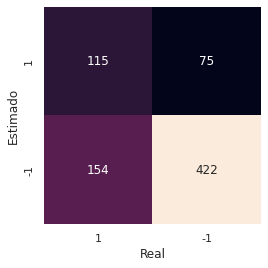

In [44]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

train_est_y = model.predict(train_x)

mat = confusion_matrix(train_y, train_est_y)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Real')
plt.ylabel('Estimado');

print(classification_report(train_y, train_est_y)) # mostra relatório
print('A acurácia é ',accuracy_score(train_est_y, train_y)) # exibe acurácia

# Matriz de confusão para o conjunto de teste

              precision    recall  f1-score   support

          -1       0.56      0.32      0.40        63
           1       0.72      0.88      0.79       129

    accuracy                           0.69       192
   macro avg       0.64      0.60      0.60       192
weighted avg       0.67      0.69      0.67       192

A acurácia é  0.6927083333333334


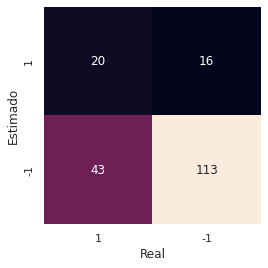

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

test_est_y = model.predict(test_x)

mat = confusion_matrix(test_y, test_est_y)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Real')
plt.ylabel('Estimado');

print(classification_report(test_y, test_est_y)) # mostra relatório
print('A acurácia é ',accuracy_score(test_est_y, test_y)) # exibe acurácia